# Reddit Uber Driver Sentiment Analyisi   

In [ ]:
pip install praw nltk pandas matplotlib

In [18]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import time

# Download VADER sentiment analyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:

# Reddit API credentials
reddit = praw.Reddit(
    client_id="Zp5-2K-IwqlZC8JKh1iB0Q",
    client_secret="nBVSmXVEyElxfpy-bjN_P-KFg4ikFQ",
    user_agent="SentimentAnalysis"
)

# Function to fetch posts
def fetch_reddit_posts(subreddit_name, limit=50):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):
        posts.append({
            "title": submission.title,
            "text": submission.selftext,
            "url": submission.url
        })
        time.sleep(1)  # To avoid rate-limiting

    return pd.DataFrame(posts)

# Function to perform sentiment analysis
def analyze_sentiment(df):
    sia = SentimentIntensityAnalyzer()
    sentiments = []

    for _, row in df.iterrows():
        text = row["title"] + " " + row["text"]
        sentiment = sia.polarity_scores(text)
        sentiments.append(sentiment["compound"])

    df["sentiment"] = sentiments
    df["sentiment_label"] = df["sentiment"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

    return df

# Fetch and analyze posts
subreddit_name = "uberdrivers"
df = fetch_reddit_posts(subreddit_name, limit=100)
df = analyze_sentiment(df)


| sentiment_label   |   sentiment | title                                                                                         | text                                                                                                                                                                                                                                                                                                                                                                                                           |
|:------------------|------------:|:----------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

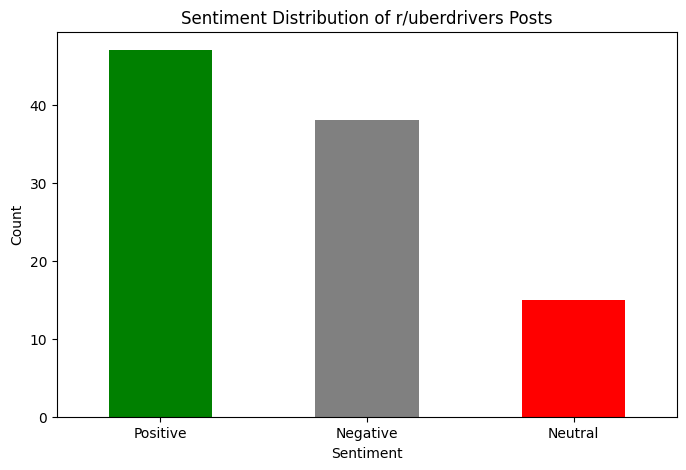

In [22]:

# Display results
print(df.tail(10)[["sentiment_label", "sentiment", "title", "text"]].to_markdown(index=False))

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
df["sentiment_label"].value_counts().plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution of r/uberdrivers Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()